**PROJECT TEAM ID**: PTID-CDS-DEC-23-1715  
**PROJECT CODE**   : PRCP-1025-FlightPricePrediction   
**PROJECT NAME**   : Flight fare prediction

## Business Case 

Flight ticket prices are something that can be hard to guess. The prices can be too dynamic and are often unpredictable. So we will try to use Machine Learning to solve this problem which can help airlines in predicting what prices they can maintain and also the customers in predicting the future flight prices and plan their journey accordingly.

In this project, we will be using essential exploratory data analysis techniques for analyzing the dataset which helps us draw some insights about the price of the flight based on the features and develop a predictive Machine learning model to predict the future pricing of the flights.

## Domain Analysis

 - #### Airline :
This column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.

 - #### Date_of_Journey: 
This column will let us know about the date on which the passenger's journey will start.

- #### Source: 
This column holds the name of the place from where the passenger's journey will start.

 - #### Destination: 
This column holds the name of the place to where passengers wanted to travel.

 - #### Route: 
In this column, we will get information about that what is the route through which passengers have opted to travel from his/her source to their destination.

 - #### Dep_time : 
Departure time is when the flight is to be take-off.

 - #### Arrival_Time:
Arrival time is when the passenger will reach his/her destination.

 - #### Duration: 
Duration is the whole time period that a flight will take to complete its journey from source to destination.

 - #### Total_Stops: 
This column will let us know in how many places flights will stop there for the flight in the whole journey.

 - #### Additional_Info: 
In this column, we will get information about food, kind of food, and other amenities.

 - #### Price: 
Price of the flight for a complete journey including all the expenses before onboarding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Flight_Fare.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [5]:
df.drop_duplicates(inplace=True)

## Basic Checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [7]:
df.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


In [8]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10463,10463,10463,10463,10462,10463,10463,10463,10462,10463
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3700,490,4346,4346,2376,233,412,544,5625,8183


### Handling with Date of Journey

In [9]:
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey).dt.month ## extracting month from the date of journey column
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey).dt.day  ## extracting day from the date of journey

### Handling with Dep_time

In [10]:
df['Dep_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min']  = pd.to_datetime(df.Dep_Time).dt.minute

### Handling with Arrival time

In [11]:
df['Arrival_Hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_Min'] = pd.to_datetime(df.Arrival_Time).dt.minute

### Handling with Duration

In [12]:
Duration = list(df.Duration)
Duration_hour = []
Duration_min = []
for i in range(len(df.Duration)):
    if len(Duration[i].split()) !=2:
        if 'h' in Duration[i]:
            Duration[i] = Duration[i] + ' 0m'
        else:
            Duration[i] = '0h '+Duration[i]
    
for i in range(len(Duration)):
    Duration_hour.append(int(Duration[i].split(sep = 'h')[0]))
    Duration_min.append(int(Duration[i].split(sep = 'm')[0].split()[-1]))

In [13]:
df['Duration_hour'] = Duration_hour
df['Duration_min'] = Duration_min

In [14]:
df.drop(['Date_of_Journey','Duration','Dep_Time','Arrival_Time'],axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

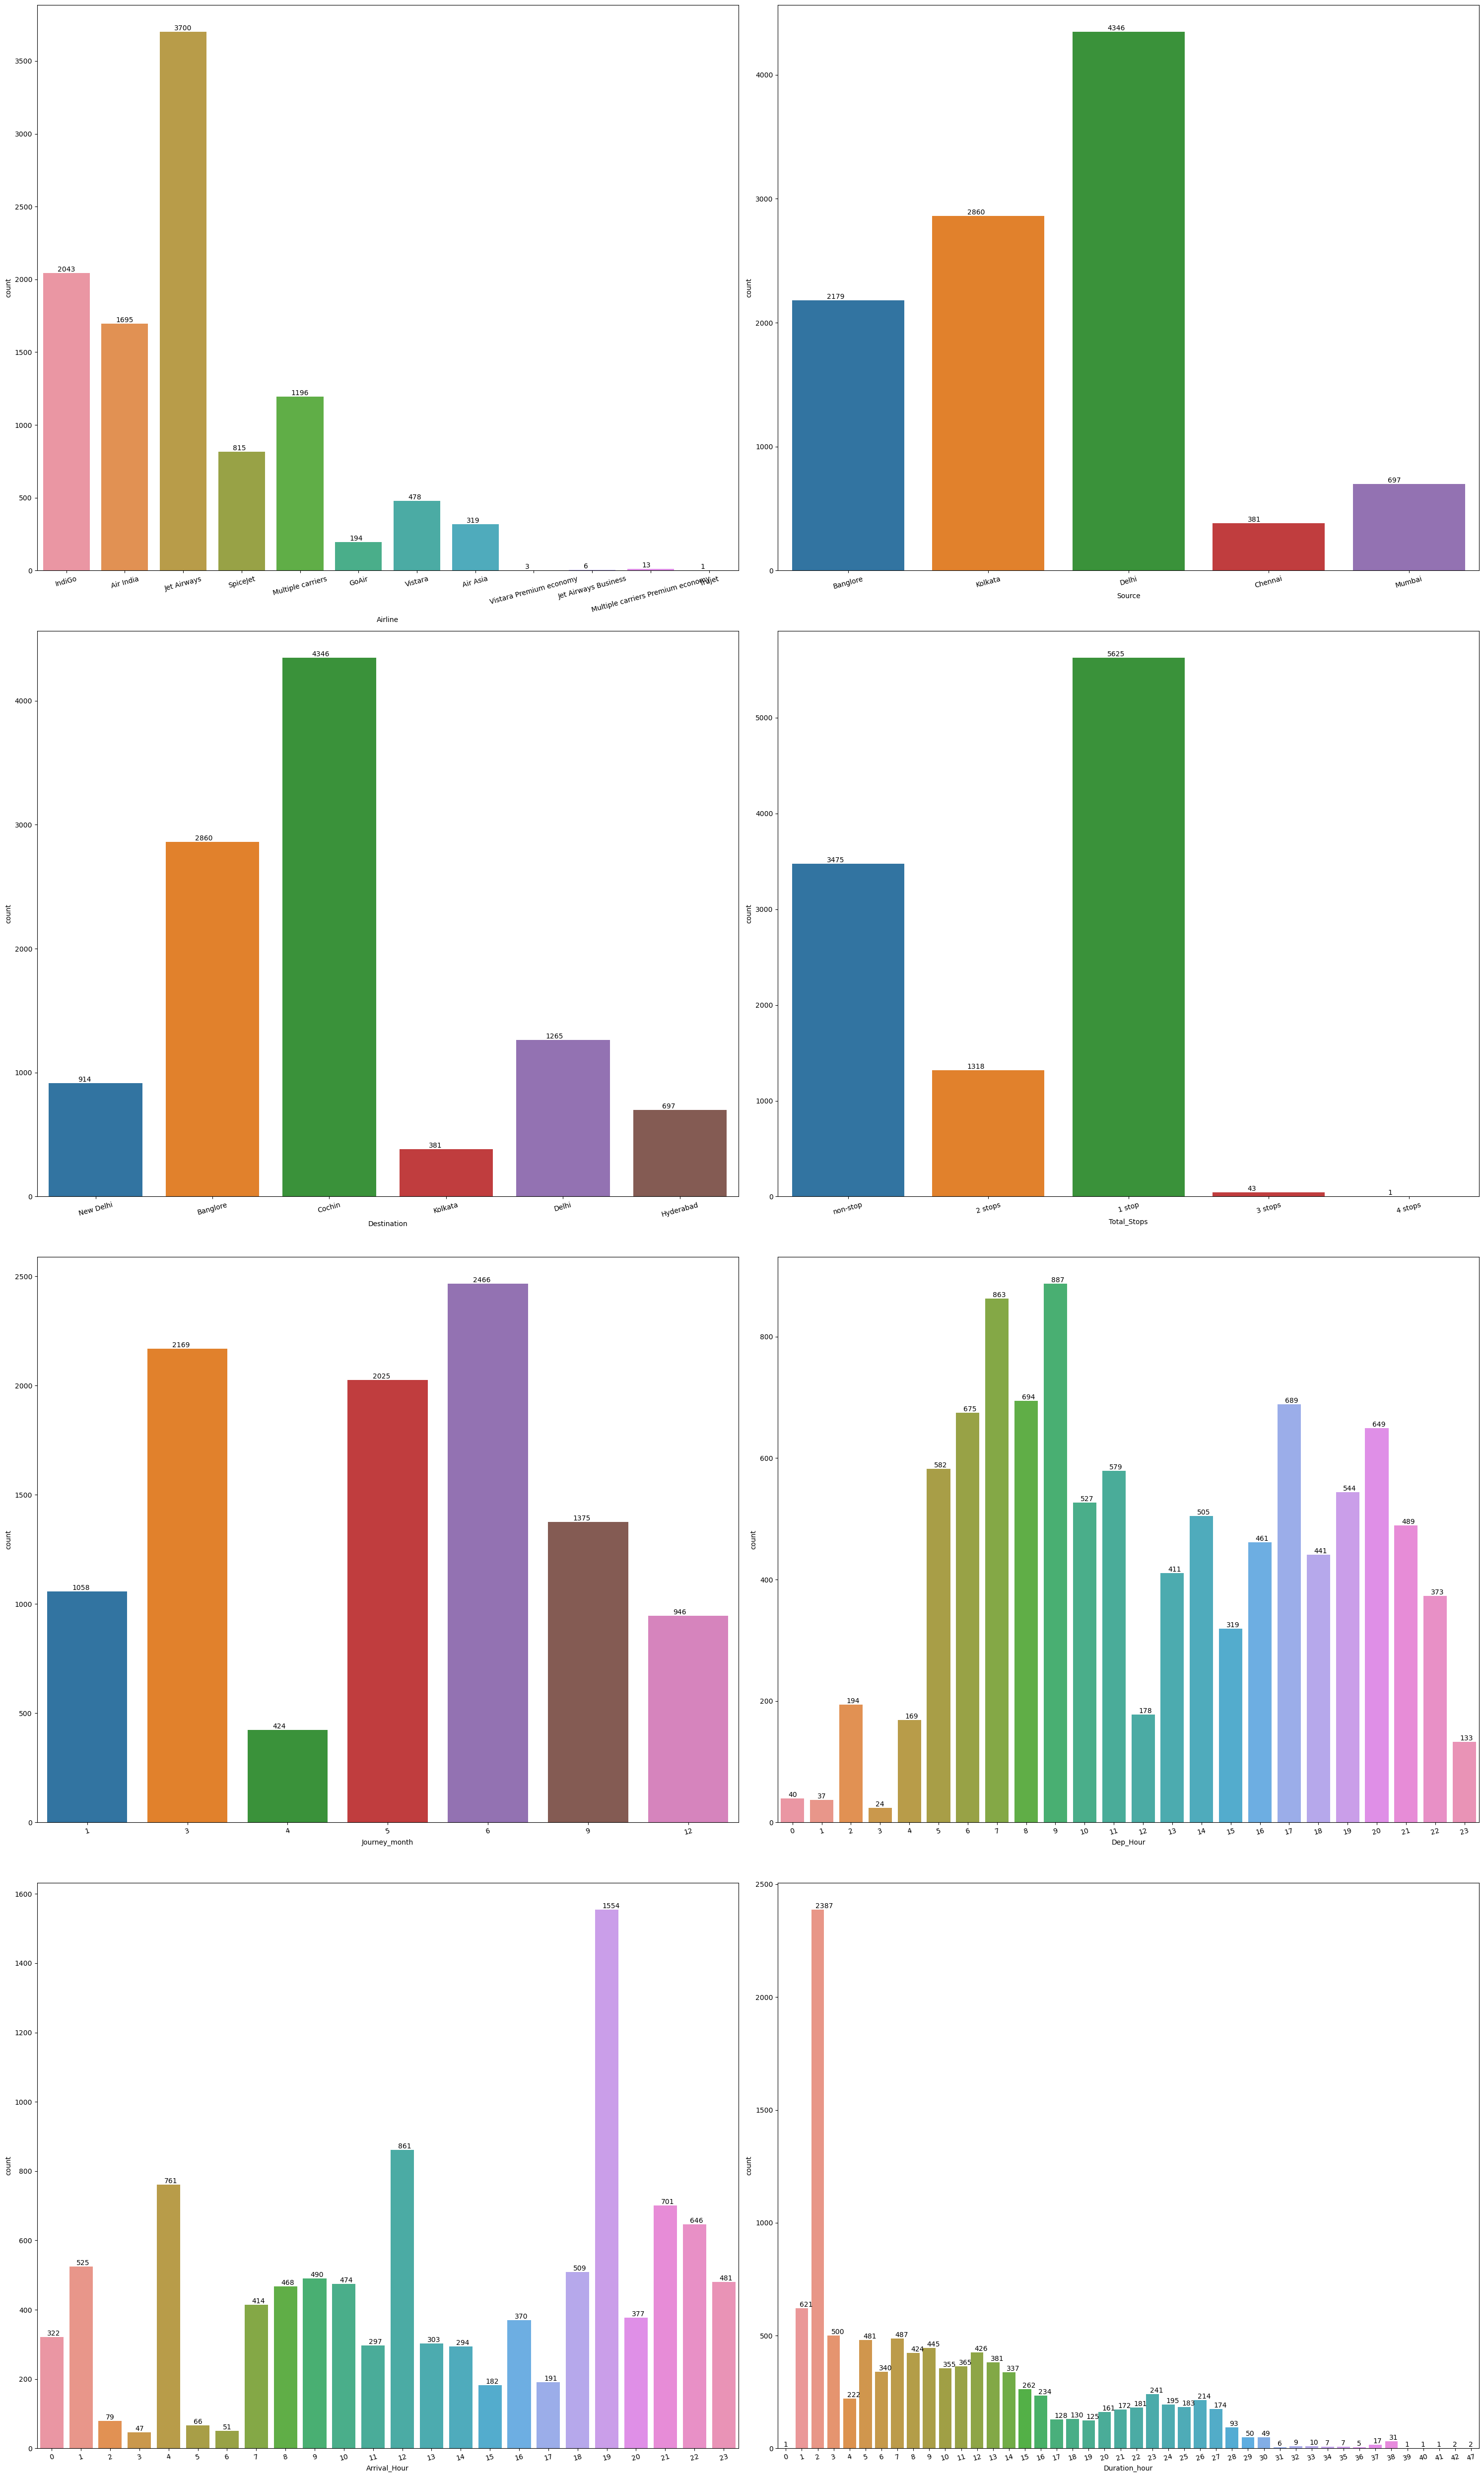

In [15]:
plt.figure(figsize=(30,50))
df1 = df.drop(['Route', 'Price', 'Dep_min', 'Arrival_Min', 'Duration_min', 'Journey_day', 'Additional_Info'],axis=1)
plotnumber = 1
for i in df1:
    plt.subplot(4,2,plotnumber)
    ax = sns.countplot(x = df1[i])
    plt.xticks(rotation = 15)
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.25,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insights

##### Airlines 
* Jet Airways is the most preferred airline followed by Indigo and AirIndia. Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.
##### Source
* 41% of the flights start from Delhi and only 3.6% of the flights start from Chennai.
##### Destination
* The 42% of flights are travelling to Cochin and 3.5% of fligths are travelling to Kolkata.
##### Total stops
* Majority of the flights have stops as 1 stop, flights with 3 and 4 stops are quite low.
##### Journey_month
* People tend to travel less in 4th month and tends to travel more in 3rd, 5th & 6th months, meaning people travel more during holiday months.
##### Dep_Hour
* Majority of the flights tend to fly in the early morning time. Count of flights taking off during 16:00 - 23:00 is also high. Afternoon flights are less in number.
##### Arrival _Hour
* Majority of the flights reach its destination in the evening time around 18:00 - 19:00. This seems to be because majority of the flights have take-off in the morning and hence land after in the evening.
##### Duration_hours
* Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights. Some flights have time around 30 hours too, this could be because of the number of stops in between.

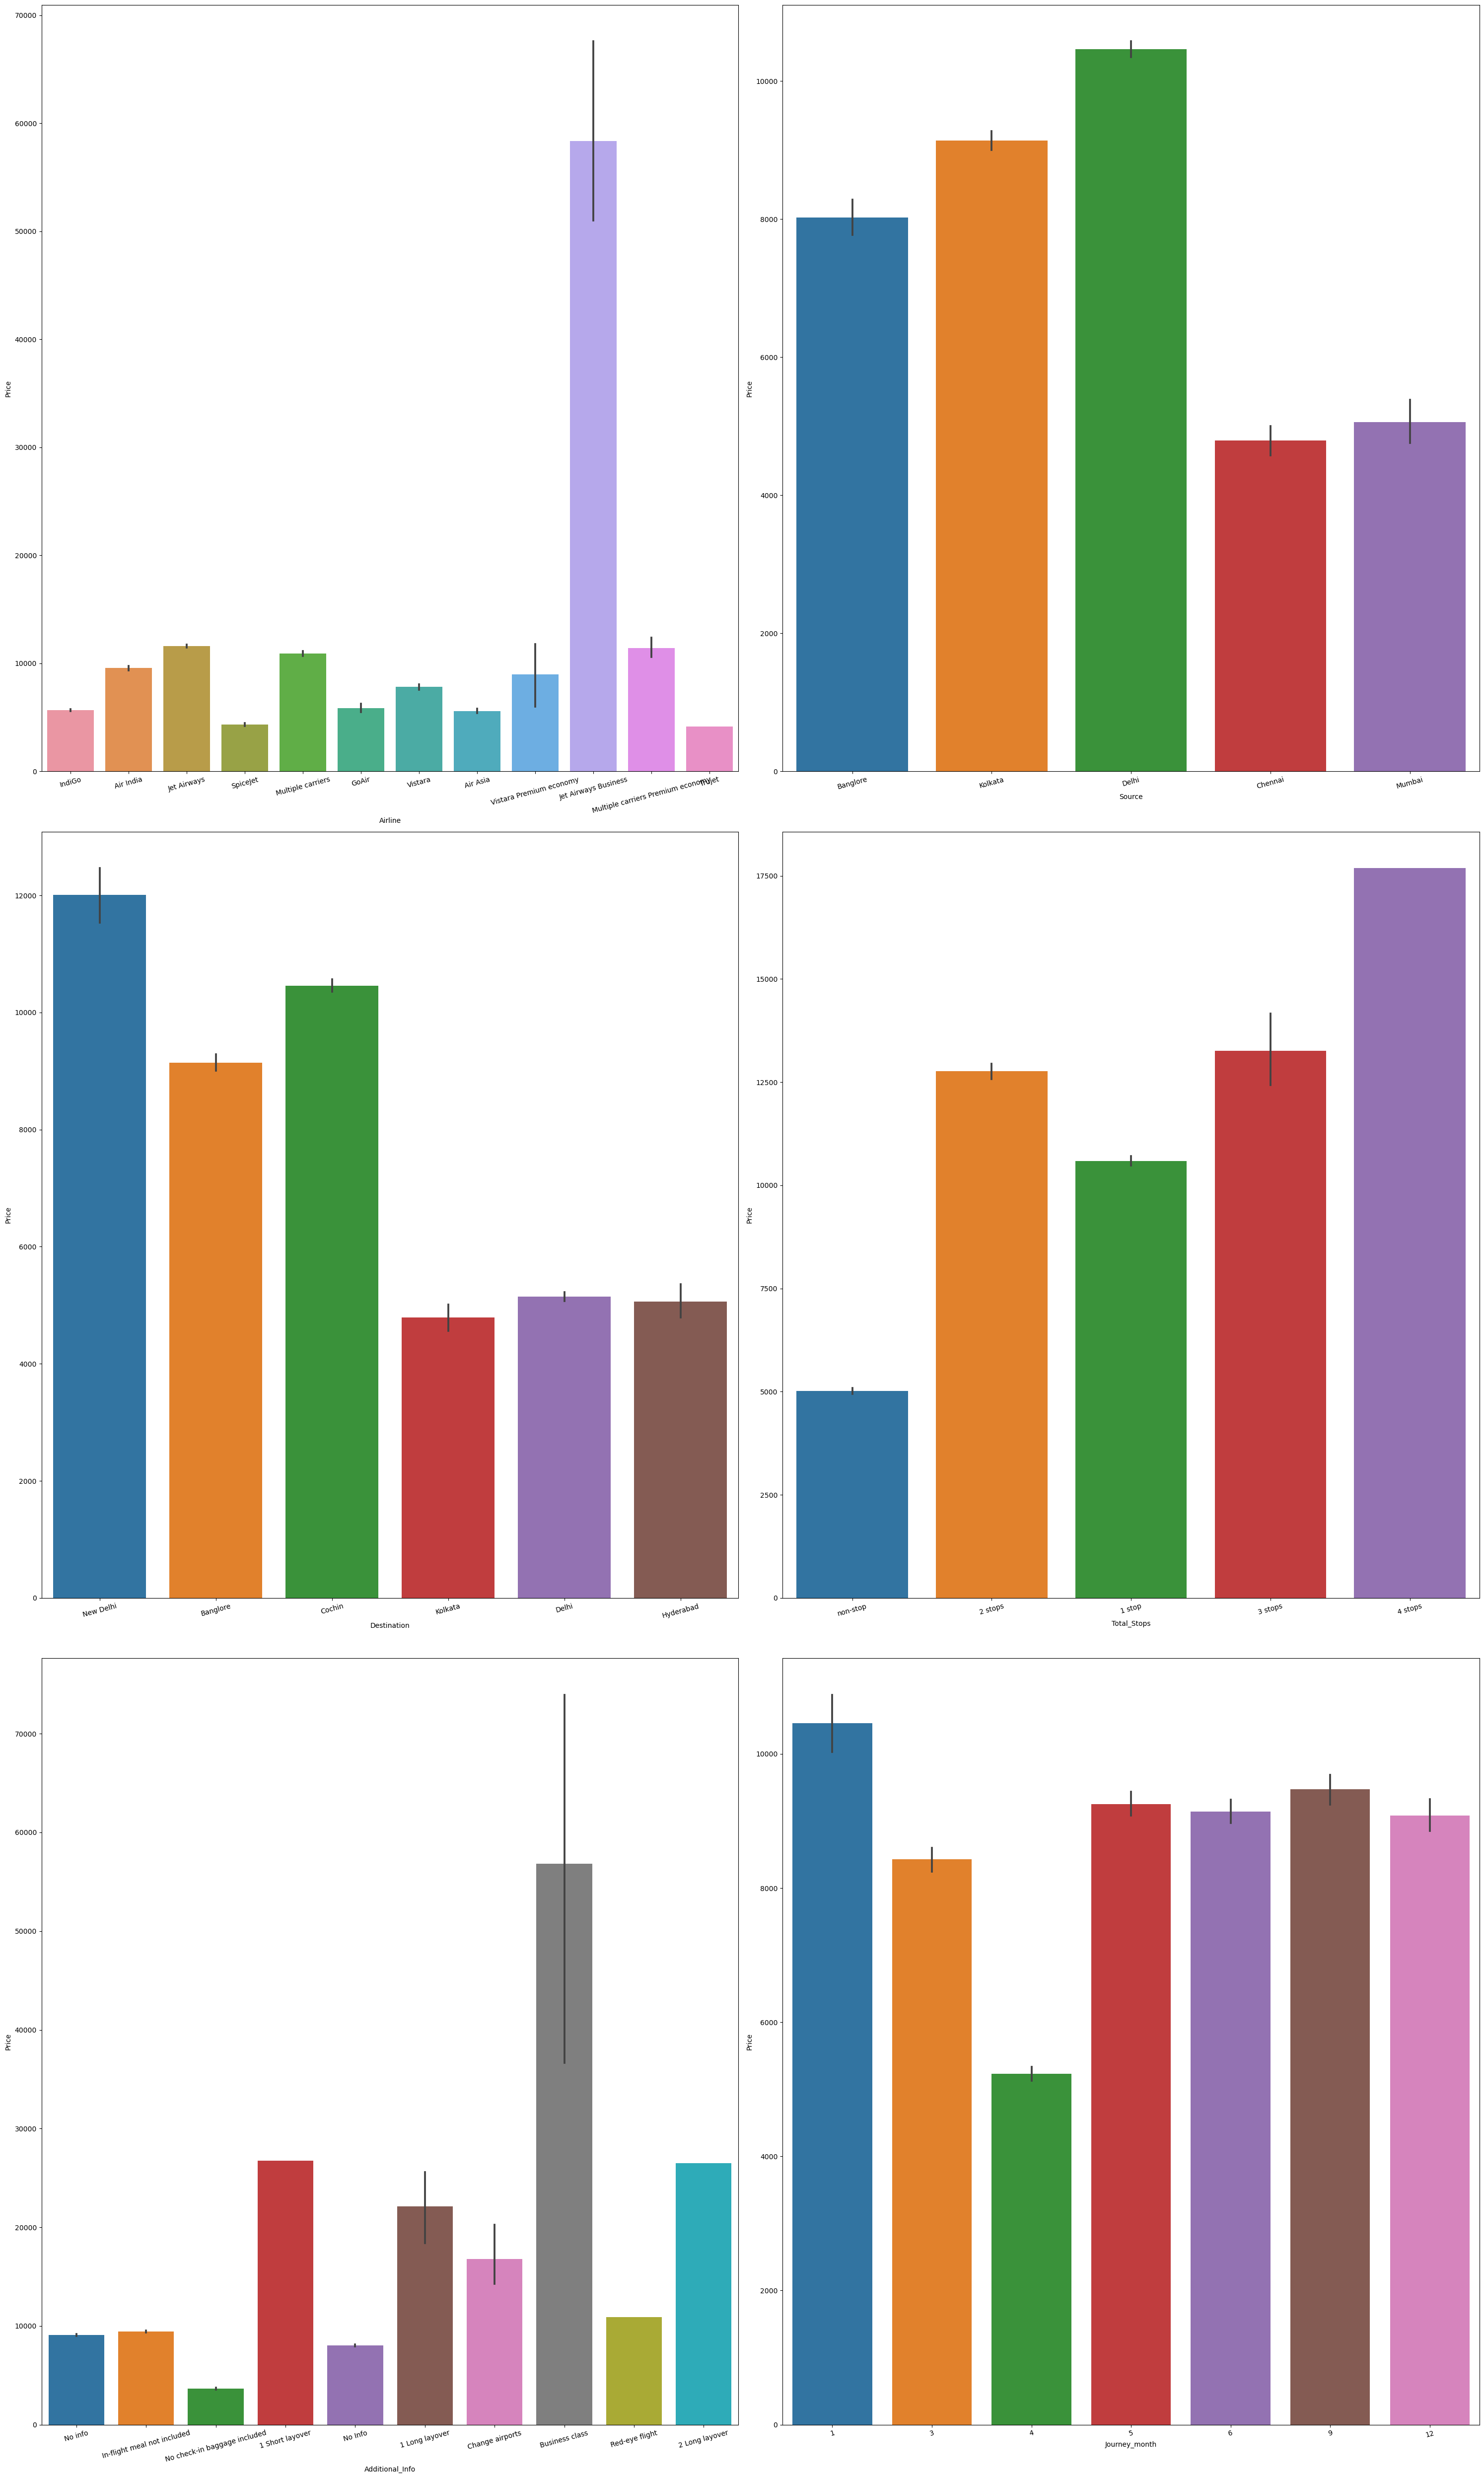

In [16]:
plt.figure(figsize=(30,50))
df2 = ['Airline','Source','Destination','Total_Stops','Additional_Info','Journey_month']
plotnumber = 1
for i in df2:
    plt.subplot(3,2,plotnumber)
    sns.barplot(data=df,x=i,y=df.Price)
    plt.xticks(rotation = 15)
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.25,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insigths

##### Price vs Airline
* Jet Airways Business has the highest price range value upto 58358rs and Trujet has the lower fare range value upto 4140rs.
##### Price vs Source
* Flights that are starting from Delhi have the highest fare range and Chennai have the lower fare range.
##### Price vs Destination
* Flights traveling to Delhi have the highest price range whereas Kolkata have lower price range.
##### Price vs Total Stops
* The flight fare keeps increasings with the number of stops where in the non stop flights have the least fare.
##### Price vs Additional Info
* The flight fares are higher for the Business classs flights and low for those without any additional amminites such as In-flight meal, Check-In Baggage.
* The fare of flight also varies for the flights having layovers.
* The fare range is lower for red-eye flights.
##### Price vs Journey month
* The flight fare is higher in 1st month and lower in the 4th month but is almost the same in rest of the months.

## Data Preprocessing

### Handling With Null Values

In [17]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_month      0
Journey_day        0
Dep_Hour           0
Dep_min            0
Arrival_Hour       0
Arrival_Min        0
Duration_hour      0
Duration_min       0
dtype: int64

In [18]:
df.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [19]:
df.loc[df.Route.isnull(),'Route'] = 'DEL → BOM → COK'

In [20]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:
df.loc[df.Total_Stops.isnull(),'Total_Stops'] = '1 stop'

### Conversion of Categorical data  to Numerical data

In [22]:
df.describe(include='O')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10463,10463,10463,10463,10463,10463
unique,12,5,6,128,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3700,4346,4346,2377,5626,8183


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['Airline'] = le.fit_transform(df.Airline)
df['Source'] = le.fit_transform(df.Source)
df['Destination'] = le.fit_transform(df.Destination)
df['Route'] = le.fit_transform(df.Route)
df['Total_Stops'] = le.fit_transform(df.Total_Stops)
df['Additional_Info'] =le.fit_transform(df.Additional_Info)

In [25]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_hour,Duration_min
0,3,0,5,18,4,8,3897,3,24,22,20,1,10,2,50
1,1,3,0,84,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,8,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,8,4107,9,4,19,55,22,25,2,30
10679,1,3,0,64,4,8,4145,4,27,20,45,23,20,2,35
10680,4,0,2,18,4,8,7229,4,27,8,20,11,20,3,0
10681,10,0,5,18,4,8,12648,1,3,11,30,14,10,2,40


## Freature Selection

In [26]:
df.drop(['Airline', 'Source', 'Destination', 'Route','Additional_Info'],axis=1).corr()

,Total_Stops,Price,Journey_month,Journey_day,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_hour,Duration_min
Total_Stops,1.000000,-0.571944,-0.055540,0.045304,0.040354,0.049250,-0.099297,0.176737,-0.613612,0.184391
Price,-0.571944,1.000000,0.008657,-0.171108,0.005174,-0.024189,0.031043,-0.086164,0.504090,-0.131683
Journey_month,-0.055540,0.008657,1.000000,-0.265203,0.028453,0.001938,-0.003051,-0.023619,0.056845,-0.021495
Journey_day,0.045304,-0.171108,-0.265203,1.000000,-0.007566,-0.013602,-0.001080,-0.019623,-0.046933,-0.007766
Dep_Hour,0.040354,0.005174,0.028453,-0.007566,1.000000,-0.015131,-0.003789,0.072987,-0.000737,-0.018883
Dep_min,0.049250,-0.024189,0.001938,-0.013602,-0.015131,1.000000,0.046494,-0.021350,-0.021981,0.089335
Arrival_Hour,-0.099297,0.031043,-0.003051,-0.001080,-0.003789,0.046494,1.000000,-0.152034,0.065483,-0.116725
Arrival_Min,0.176737,-0.086164,-0.023619,-0.019623,0.072987,-0.021350,-0.152034,1.000000,-0.075930,0.156174
Duration_hour,-0.613612,0.504090,0.056845,-0.046933,-0.000737,-0.021981,0.065483,-0.075930,1.000000,-0.133877
Duration_min,0.184391,-0.131683,-0.021495,-0.007766,-0.018883,0.089335,-0.116725,0.156174,-0.133877,1.000000


<Axes: >

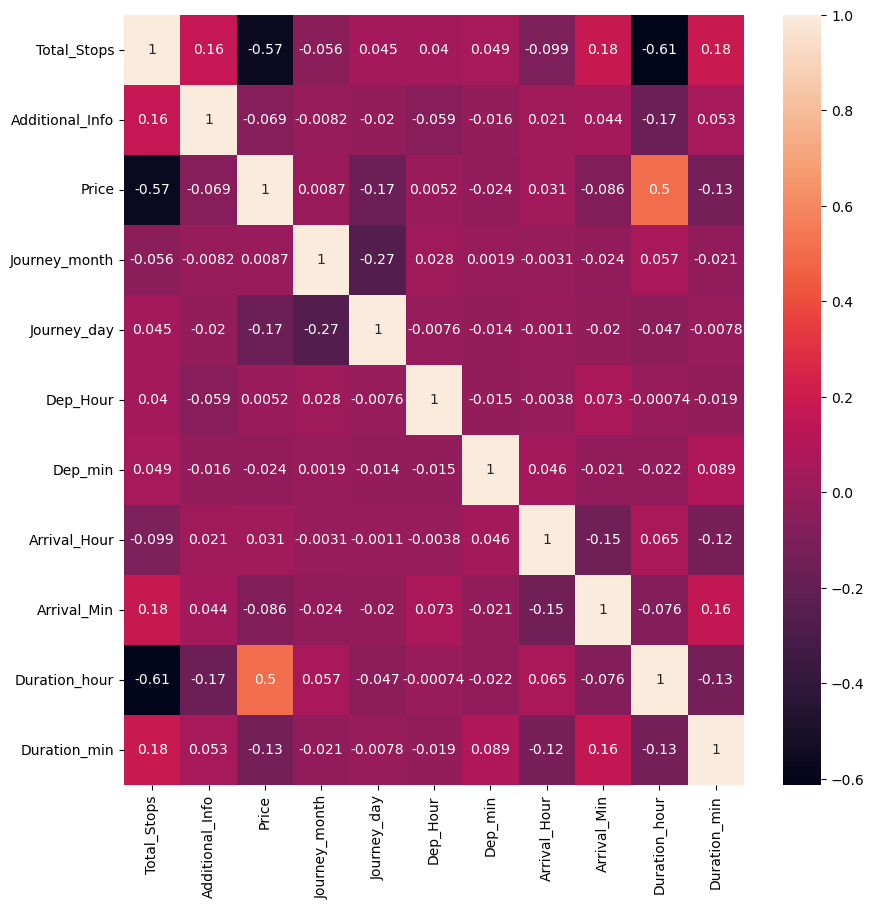

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(['Airline', 'Source', 'Destination', 'Route'],axis=1).corr(),annot=True)

## Model Creation

In [28]:
x = df.drop('Price',axis = 1)
y = df.Price
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42,test_size=0.25)

In [29]:
print(x_train.shape)
print(x_test.shape)

(7847, 14)
(2616, 14)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [32]:
lr.intercept_

9809.747256329616

In [33]:
lr.coef_

array([   56.79473544,  -240.19795527,   300.88069779,    -8.52892139,
       -1247.35939716,   226.50734362,   -84.86656152,   -71.64753285,
          26.73187333,    -1.56411495,   -20.19434457,     2.10992173,
         146.34764963,   -12.61626775])

In [34]:
r2_lr = r2_score(y_test,y_pred)
r2_lr

In [35]:
adj_r2_score_lr = 1-(1-r2_score(y_test,y_pred))*(2671-1)/(2671-14-1)
adj_r2_score_lr

0.4194779102297067

### SVM

In [36]:
svm = SVR()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

In [37]:
r2_svm = r2_score(y_test,y_pred_svm)
r2_svm

In [38]:
adj_r2_score_svm = 1-(1-r2_score(y_test,y_pred_svm))*(2671-1)/(2671-14-1)
adj_r2_score_svm

0.009874102053125222

### KNN

In [39]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [40]:
r2_score(y_test,y_pred_knn)

0.6362736867503703

In [41]:
(y_test != y_pred).sum()

2616

In [42]:
error_rate = (y_test != y_pred).sum()/len(y_test)
error_rate

1.0

In [43]:
error = []
for i in range(1,11):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred = KNN.predict(x_test)
    error_rate1 = (y_test != y_pred).sum()/len(y_test)*100
    error.append(error_rate1)

In [44]:
error

[72.66819571865443,
 88.34097859327217,
 94.1131498470948,
 97.20948012232415,
 98.31804281345565,
 98.81498470948013,
 99.42660550458714,
 99.6559633027523,
 99.61773700305811,
 99.61773700305811]

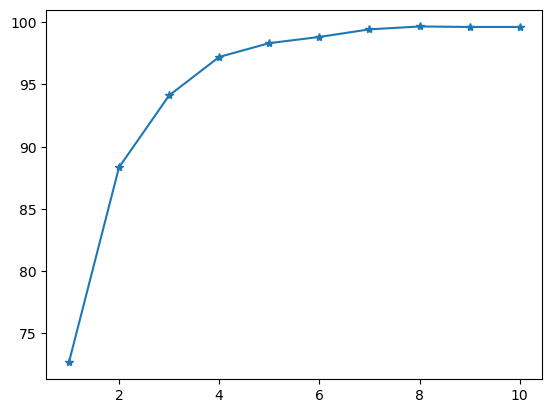

In [45]:
plt.plot(range(1,11),error,marker = '*')

In [46]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(x_train,y_train)
y_pred_knn = KNN.predict(x_test)

In [47]:
r2_knn = r2_score(y_test,y_pred_knn)
r2_knn

In [48]:
adj_r2_score_knn = 1-(1-r2_score(y_test,y_pred_knn))*(2671-1)/(2671-14-1)
adj_r2_score_knn

0.6526514097303941

### Decision Tree 

In [49]:
dt = DecisionTreeRegressor(random_state= 52)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [50]:
r2_dt = r2_score(y_test,y_pred_dt)
r2_dt

In [51]:
adj_r2_score_dt = 1-(1-r2_score(y_test,y_pred_dt))*(2671-1)/(2671-14-1)
adj_r2_score_dt

0.7902510229120832

### Random Forest

In [52]:
rf = RandomForestRegressor(n_estimators=100,random_state=21)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [53]:
r2_score(y_test,y_pred_rf)

0.889006184536304

In [54]:
adj_r2_score = 1-(1-r2_score(y_test,y_pred_rf))*(2671-1)/(2671-14-1)
adj_r2_score

0.8884211267740707

Hyperparameter Tuning using Random forest

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [56]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [57]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)


In [58]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=21),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [59]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [60]:
rf_hyp = RandomForestRegressor( n_estimators = 100,
  min_samples_split = 5,
  min_samples_leaf = 1,
  max_depth = 20,
  bootstrap = True)

In [61]:
rf_hyp.fit(x_train,y_train)
y_pred_rf_hyp = rf_hyp.predict(x_test)

In [62]:
r2_rf = r2_score(y_test,y_pred_rf_hyp)
r2_rf

In [63]:
adj_r2_score_rf = 1-(1-r2_score(y_test,y_pred_rf_hyp))*(2671-1)/(2671-14-1)
adj_r2_score_rf

0.892331604460048

### Gradient Boosting

In [64]:
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)

In [65]:
r2_score(y_test,y_pred_gb)

0.816459980773341

In [66]:
adj_r2_score = 1-(1-r2_score(y_test,y_pred_gb))*(2671-1)/(2671-14-1)
adj_r2_score

0.8154925258527186

 Hyperparameter Tuning Using Gradient Boosting

In [67]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [68]:
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [69]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.2}

In [71]:
gb_hyp = GradientBoostingRegressor( subsample = 0.9,
  n_estimators = 200,
  min_samples_split = 5,
  min_samples_leaf = 2,
  max_depth = 5,
  learning_rate = 0.2)

In [72]:
gb_hyp.fit(x_train,y_train)
y_pred_gb_hyp = gb_hyp.predict(x_test)

In [73]:
r2_gb = r2_score(y_test,y_pred_gb_hyp)
r2_gb

In [74]:
adj_r2_score_gb = 1-(1-r2_score(y_test,y_pred_gb_hyp))*(2671-1)/(2671-14-1)
adj_r2_score_gb

0.8882092694033095

### Xgboost

In [75]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

In [76]:
r2_score(y_test,y_pred_xgb)

0.8957784493048471

In [77]:
adj_r2_score = 1-(1-r2_score(y_test,y_pred_xgb))*(2671-1)/(2671-14-1)
adj_r2_score

0.8952290887213636

Hyperparameter Tuning Using XGBoosting

In [78]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [79]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [80]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [81]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [82]:
xgb_hyp = XGBRegressor( subsample = 0.9,
  n_estimators = 300,
  min_child_weight = 1,
  max_depth = 6,
  learning_rate = 0.2,
  gamma = 0,
  colsample_bytree = 1.0)

In [83]:
xgb_hyp.fit(x_train,y_train)
y_pred_xgb_hyp = xgb_hyp.predict(x_test)

In [84]:
r2_xgb = r2_score(y_test,y_pred_xgb_hyp)
r2_xgb

In [85]:
adj_r2_score_xgb = 1-(1-r2_score(y_test,y_pred_xgb_hyp))*(2671-1)/(2671-14-1)
adj_r2_score_xgb

0.8958440566769024

# Conclusions

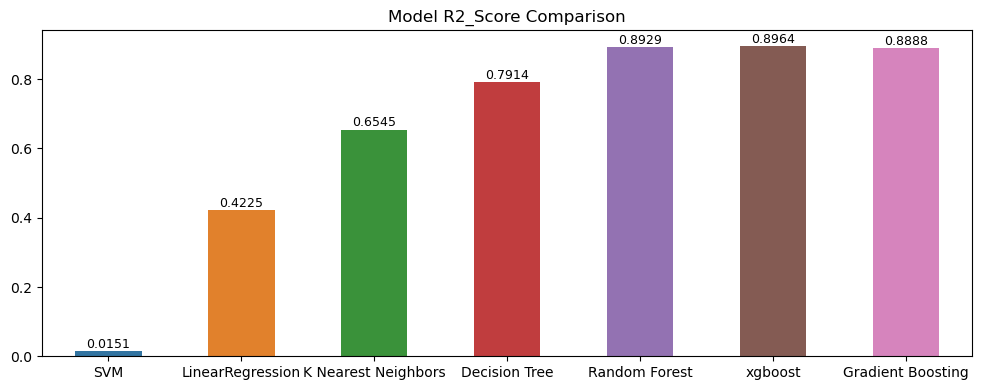

In [86]:
models=['SVM','LinearRegression','KNN','Decision Tree','Random Forest','xgboost','Gradient Boosting']
r2_scores=[r2_svm, r2_lr, r2_knn, r2_dt, r2_rf, r2_xgb, r2_gb]

plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=r2_scores,width=0.5)
plt.title('Model R2_Score Comparison')
for index, value in enumerate(r2_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

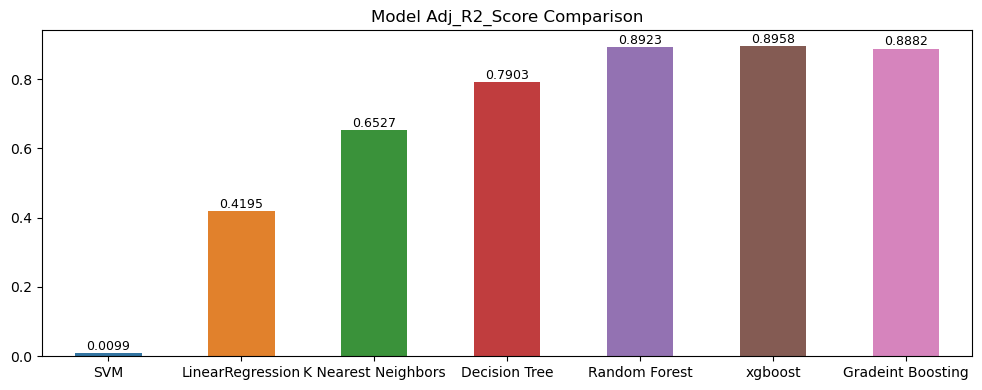

In [87]:
models=['SVM','LinearRegression','KNN','Decision Tree','Random Forest','xgboost','Gradeint Boosting']
Adj_r2_scores=[adj_r2_score_svm, adj_r2_score_lr, adj_r2_score_knn, adj_r2_score_dt, adj_r2_score_rf, adj_r2_score_xgb, adj_r2_score_gb]

plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=Adj_r2_scores,width=0.5)
plt.title('Model Adj_R2_Score Comparison')
for index, value in enumerate(Adj_r2_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

## Conclusion

Using Random Forest, XGBoost & Gradient Boosting we achieved almost similar r2_score and adj_r2_score values i.e, above 89%, meaning that we are actually able to predict values quite near to the actual prices for majority of the rows.

So we can use any of these 3 predictive models, out of which XGBoost giving the highest performance, for production to solve our problem in prediciting the flight fare.